In [34]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
# Fill in your file paths
mean_temp_path = 'data/nclimgrid_tavg.nc'
max_temp_path = 'data/nclimgrid_tmax.nc'
mean_precip_path = 'data/nclimgrid_prcp.nc'

# Read in the NetCDF files using xarray
mean_temp_ds = xr.open_dataset(mean_temp_path)
max_temp_ds = xr.open_dataset(max_temp_path)
mean_precip_ds = xr.open_dataset(mean_precip_path)

print(mean_temp_ds)
print(max_temp_ds)
print(mean_precip_ds)

<xarray.Dataset> Size: 5GB
Dimensions:  (time: 1562, lat: 596, lon: 1385)
Coordinates:
  * time     (time) datetime64[ns] 12kB 1895-01-01 1895-02-01 ... 2025-02-01
  * lat      (lat) float32 2kB 49.35 49.31 49.27 49.23 ... 24.65 24.6 24.56
  * lon      (lon) float32 6kB -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
Data variables:
    tavg     (time, lat, lon) float32 5GB ...
Attributes: (12/14)
    date_created:              2025-01-07 13:14:21.839853
    date_modified:             2025-01-07 13:14:21.840002
    Conventions:               CF-1.6, ACDD-1.3
    ncei_template_version:     NCEI_NetCDF_Grid_Template_v2.0
    title:                     nClimGrid
    naming_authority:          gov.noaa.ncei
    ...                        ...
    geospatial_lat_min:        24.562532
    geospatial_lat_max:        49.3542
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
<xa

In [6]:
print(mean_temp_ds.variables)
print(mean_temp_ds.dims)

Frozen({'time': <xarray.IndexVariable 'time' (time: 1562)> Size: 12kB
array(['1895-01-01T00:00:00.000000000', '1895-02-01T00:00:00.000000000',
       '1895-03-01T00:00:00.000000000', ..., '2024-12-01T00:00:00.000000000',
       '2025-01-01T00:00:00.000000000', '2025-02-01T00:00:00.000000000'],
      shape=(1562,), dtype='datetime64[ns]')
Attributes:
    long_name:      Time, in monthly increments
    standard_name:  time
    axis:           T, 'lat': <xarray.IndexVariable 'lat' (lat: 596)> Size: 2kB
array([49.3542  , 49.312534, 49.270866, ..., 24.645866, 24.6042  , 24.562532],
      shape=(596,), dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
    valid_min:      24.562532
    valid_max:      49.3542, 'lon': <xarray.IndexVariable 'lon' (lon: 1385)> Size: 6kB
array([-124.6875  , -124.645836, -124.604164, ...,  -67.104164,  -67.0625  ,
        -67.020836], shape=(1385,), dtype=float32)
Attributes

In [5]:
print(mean_temp_ds['tavg'].mean().item())
print(max_temp_ds['tmax'].max().item())
print(mean_precip_ds['prcp'].min().item())

10.911360740661621
49.509765625
0.0


Mean Temperature for the first time step

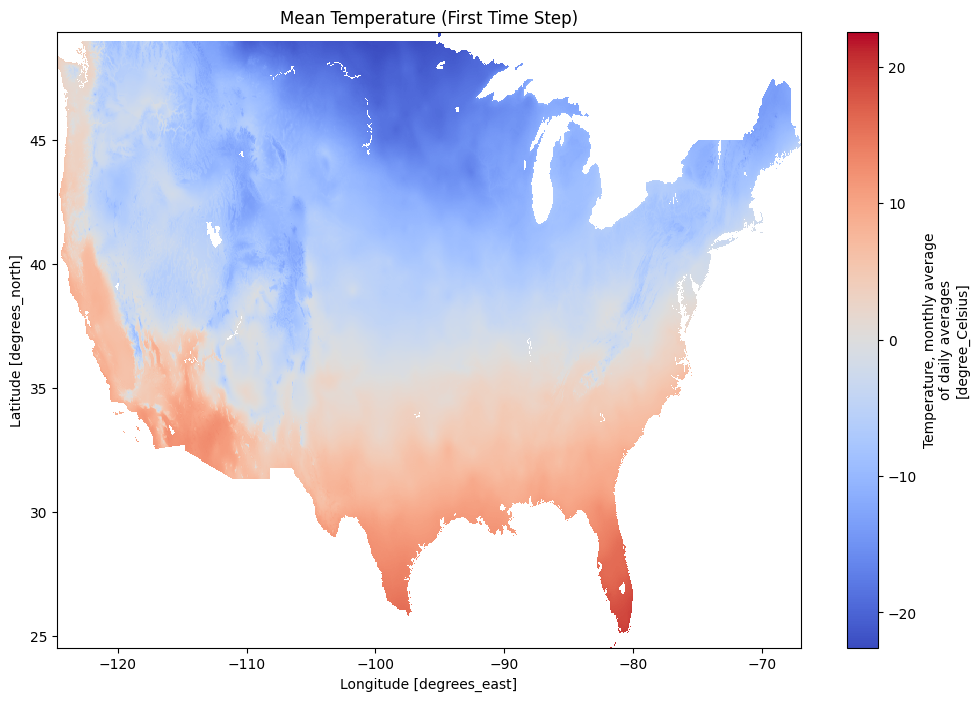

In [7]:
plt.figure(figsize=(12, 8))  # Adjust width and height as needed
mean_temp_ds['tavg'].isel(time=0).plot(cmap='coolwarm')
plt.title('Mean Temperature (First Time Step)')
plt.show()

Monthy Averages

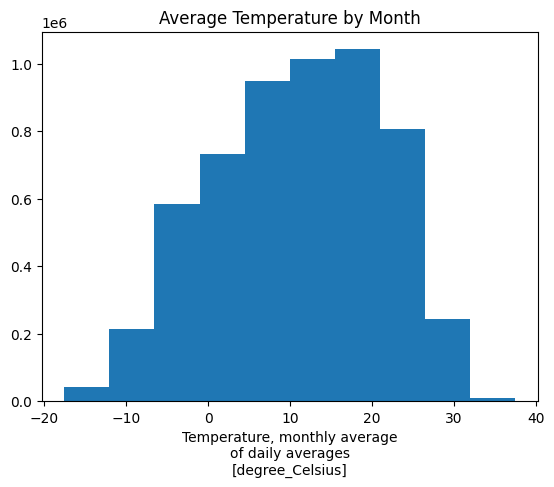

In [8]:
monthly_avg = mean_temp_ds['tavg'].groupby('time.month').mean('time')
monthly_avg.plot()
plt.title("Average Temperature by Month")
plt.show()


c:\Users\AstroNoah\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


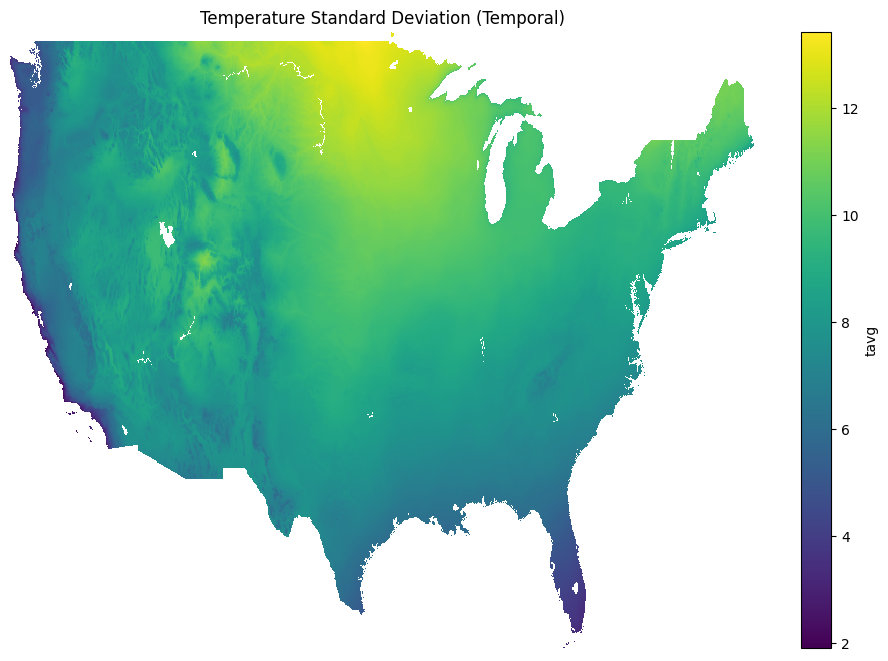

c:\Users\AstroNoah\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


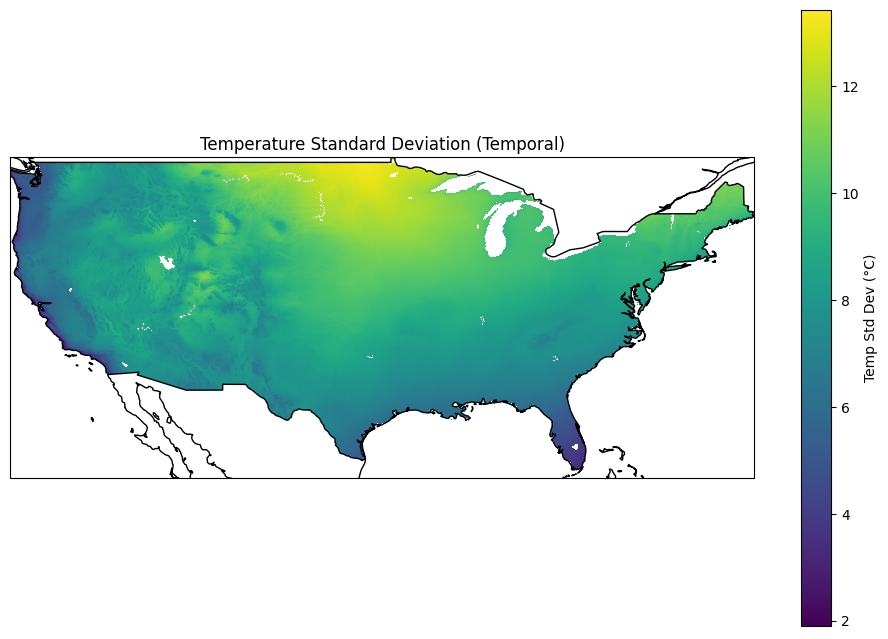

c:\Users\AstroNoah\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


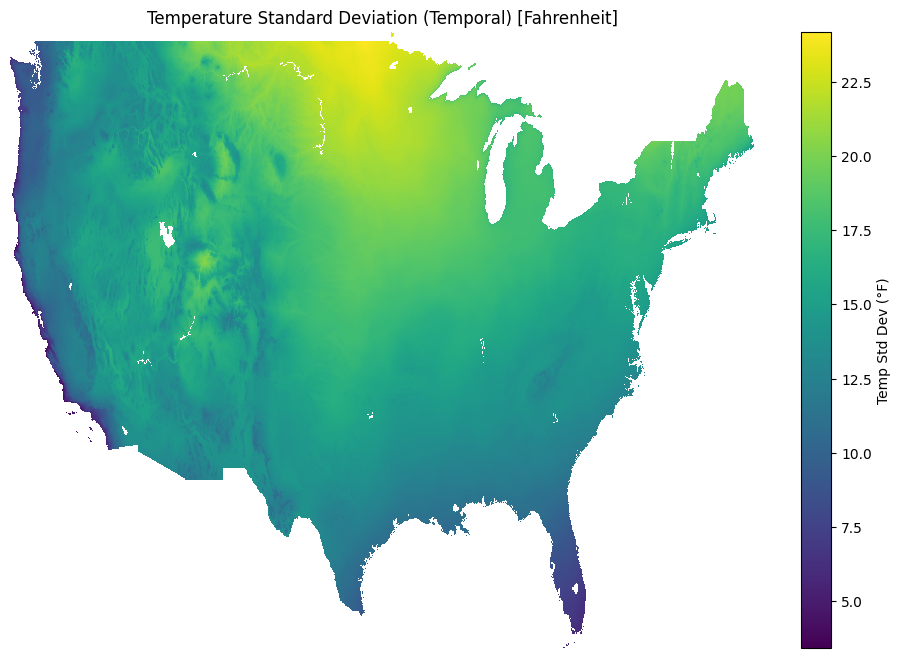

In [45]:
mean_temp_ds['tavg'].std('time').plot(cmap='viridis',figsize = (12,8))
plt.title("Temperature Standard Deviation (Temporal)")
plt.axis("off")
plt.show()
import cartopy.crs as ccrs
import cartopy.feature as cfeature

std_temp = mean_temp_ds['tavg'].std('time')

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
std_temp.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temp Std Dev (°C)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Temperature Standard Deviation (Temporal)")
plt.show()
(mean_temp_ds['tavg'].std('time') * 9/5).plot(
    cmap='viridis',
    figsize=(12, 8),
    cbar_kwargs={'label': 'Temp Std Dev (°F)'}
)

plt.title("Temperature Standard Deviation (Temporal) [Fahrenheit]")
plt.axis("off")
plt.show()

Mean temperature

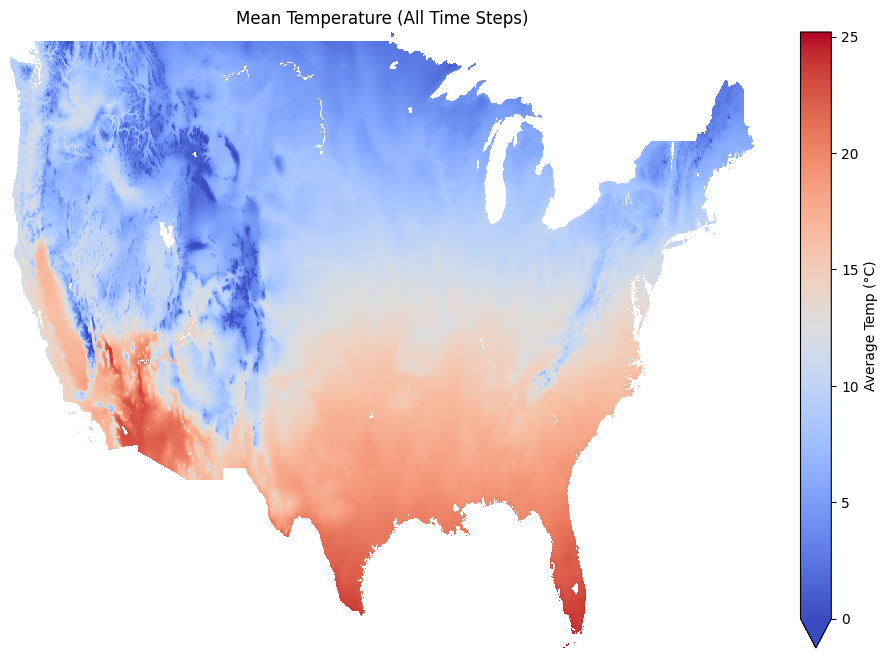

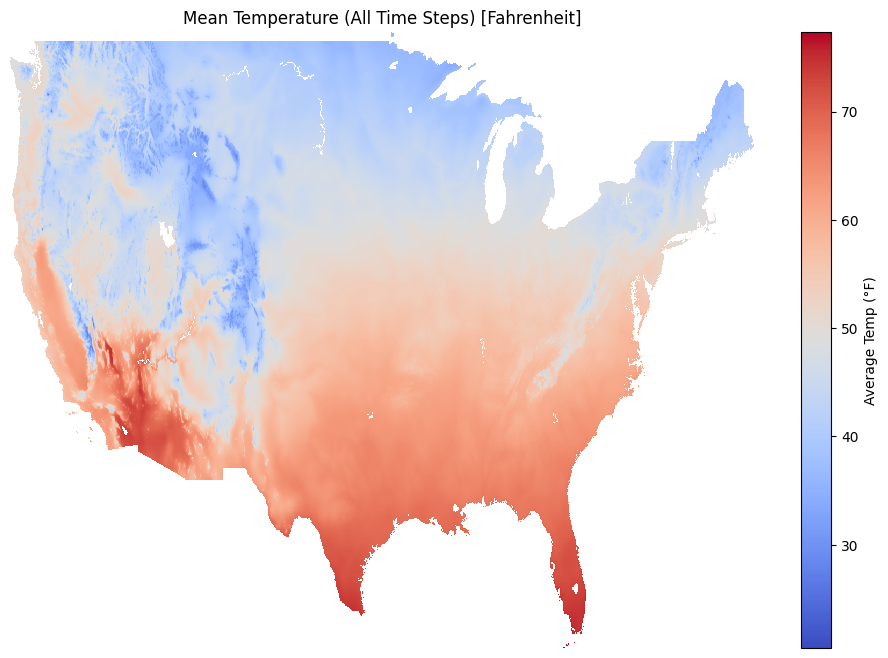

In [43]:
mean_temp_ds['tavg'].mean('time').plot(
    cmap='coolwarm',vmin = 0,
    figsize=(12, 8),
    cbar_kwargs={'label': 'Average Temp (°C)'}
)

plt.title("Mean Temperature (All Time Steps)")
plt.axis("off")
plt.show()

(mean_temp_ds['tavg'].mean('time') * 9/5 + 32).plot(
    cmap='coolwarm',
    figsize=(12, 8),
    cbar_kwargs={'label': 'Average Temp (°F)'}
)

plt.title("Mean Temperature (All Time Steps) [Fahrenheit]")
plt.axis("off")
plt.show()

Trend over years

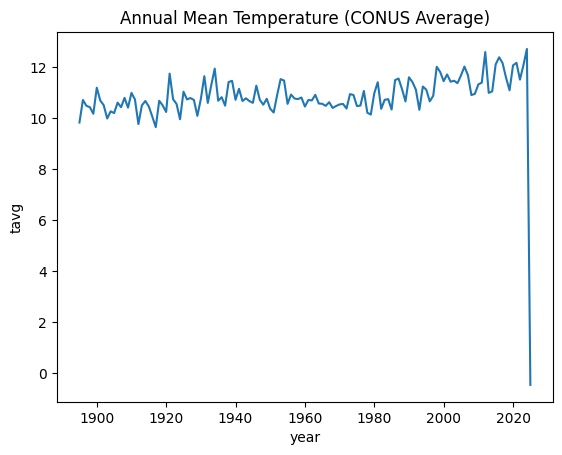

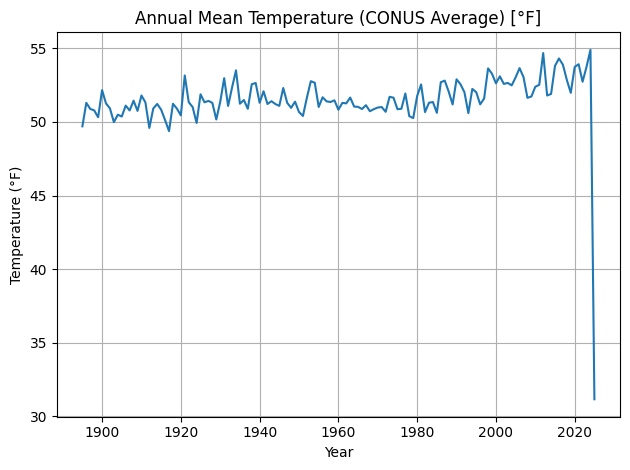

In [28]:
annual_avg = mean_temp_ds['tavg'].groupby('time.year').mean('time')
annual_avg.mean(dim=['lat', 'lon']).plot()
plt.title("Annual Mean Temperature (CONUS Average)")
plt.show()
annual_avg = mean_temp_ds['tavg'].groupby('time.year').mean('time')
annual_avg_F = annual_avg.mean(dim=['lat', 'lon']) * 9/5 + 32

annual_avg_F.plot()
plt.title("Annual Mean Temperature (CONUS Average) [°F]")
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

We have an issue, our latest year is not complete and we need to drop it so we can groupby and average annually.

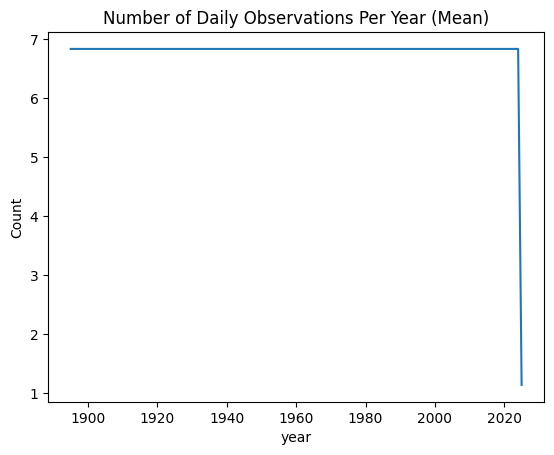

In [10]:
counts_per_year = mean_temp_ds['tavg'].groupby('time.year').count(dim='time')

# Plot to see if the last year has fewer days
counts_per_year.mean(dim=['lat', 'lon']).plot()
plt.title("Number of Daily Observations Per Year (Mean)")
plt.ylabel("Count")
plt.show()

Drop latest incomplete year

In [65]:

def drop_last_year(ds, time_var='time'):
    years = ds[time_var].dt.year
    return ds.sel({time_var: years != years.max()})
cleaned_ds = drop_last_year(mean_temp_ds)

Annual mean temperatures for the CONUS through all years. Notice anything?

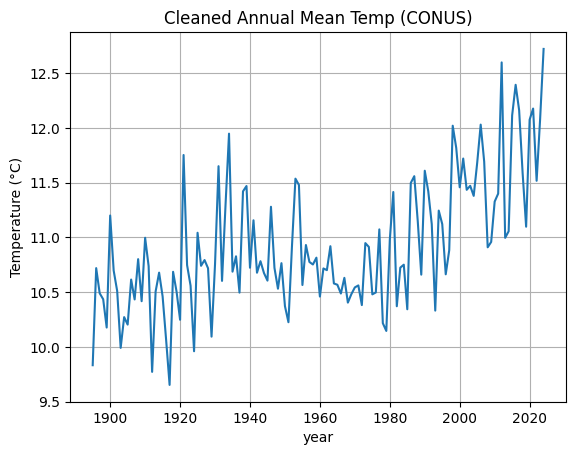

In [66]:
annual_avg = cleaned_ds['tavg'].groupby('time.year').mean('time')
annual_conus = annual_avg.mean(dim=['lat', 'lon'])

annual_conus.plot()
plt.title("Cleaned Annual Mean Temp (CONUS)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


Let's add a trend with slope to really picture this increase

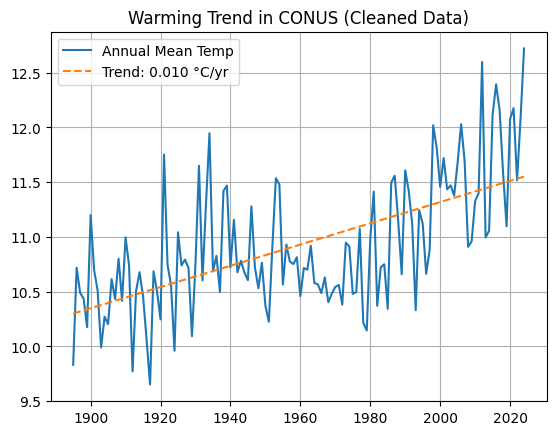

In [110]:
from scipy.stats import linregress

years = annual_conus['year'].values
temps = annual_conus.values
slope, intercept, *_ = linregress(years, temps)

plt.plot(years, temps, label="Annual Mean Temp")
plt.plot(years, intercept + slope * years, label=f"Trend: {slope:.3f} °C/yr", linestyle="--")
plt.title("Warming Trend in CONUS (Cleaned Data)")
plt.legend()
plt.grid(True)
plt.savefig('annualmeantemp.png',dpi = 300)
plt.show()

CONUS average monthly temperature averaged through all years.

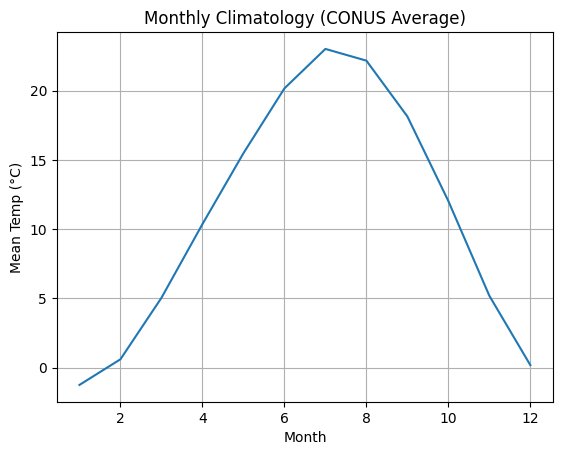

In [62]:
monthly_climatology = cleaned_ds['tavg'].groupby('time.month').mean('time')
monthly_climatology.mean(dim=['lat', 'lon']).plot()
plt.title("Monthly Climatology (CONUS Average)")
plt.ylabel("Mean Temp (°C)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


Let's look at anomolous temperatures with regard to an established baseline.

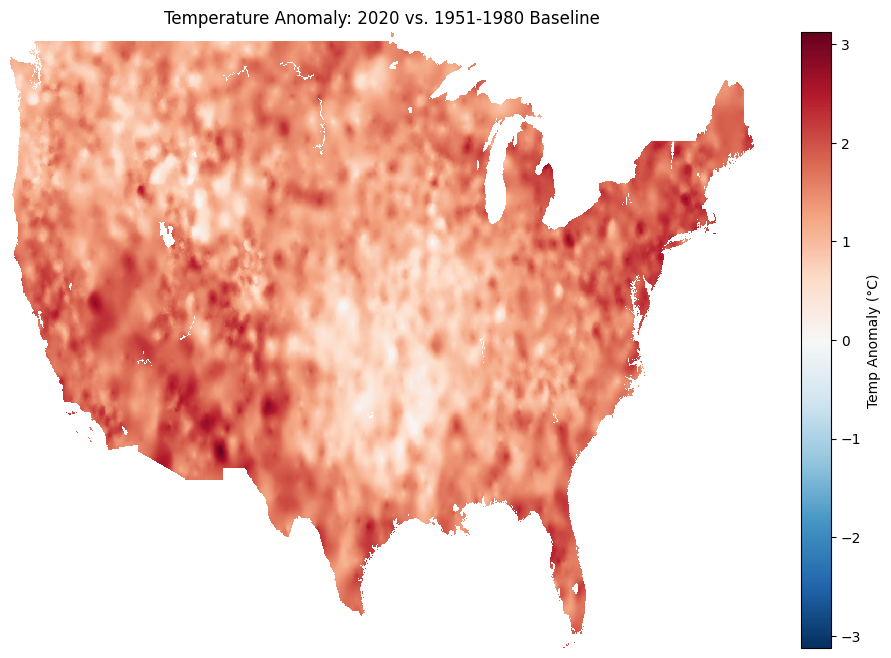

In [112]:
baseline = cleaned_ds['tavg'].sel(time=slice("1951", "1980")).mean('time')
annual_anomalies = cleaned_ds['tavg'].groupby('time.year').mean('time') - baseline

# Map anomaly for specific year
anomaly_2020 = annual_anomalies.sel(year=2020)
anomaly_2020.plot(cmap='RdBu_r', center=0, figsize=(12, 8),
                  cbar_kwargs={'label': 'Temp Anomaly (°C)'})
plt.title("Temperature Anomaly: 2020 vs. 1951-1980 Baseline")
plt.axis("off")
plt.savefig("tempanomaly.png")
plt.show()


This is essentially esablishing a baseline using the mean avg annual temperature from 1951-1980, and subtracting that from the year 2020. As you can see, all anomolies are WARMER.

### Mean Percipitation

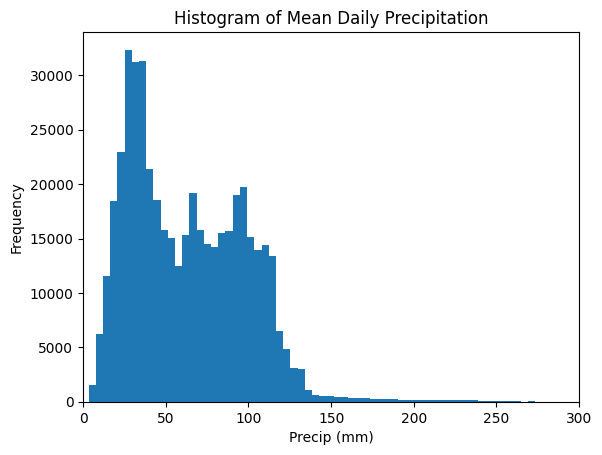

In [44]:
mean_prcp = mean_precip_ds['prcp'].mean('time')
mean_prcp_values = mean_prcp.values.flatten()

# Plot histogram to see where most data lives
plt.hist(mean_prcp_values[~np.isnan(mean_prcp_values)], bins=100)
plt.title("Histogram of Mean Daily Precipitation")
plt.xlim(0,300)
plt.xlabel("Precip (mm)")
plt.ylabel("Frequency")
plt.show()

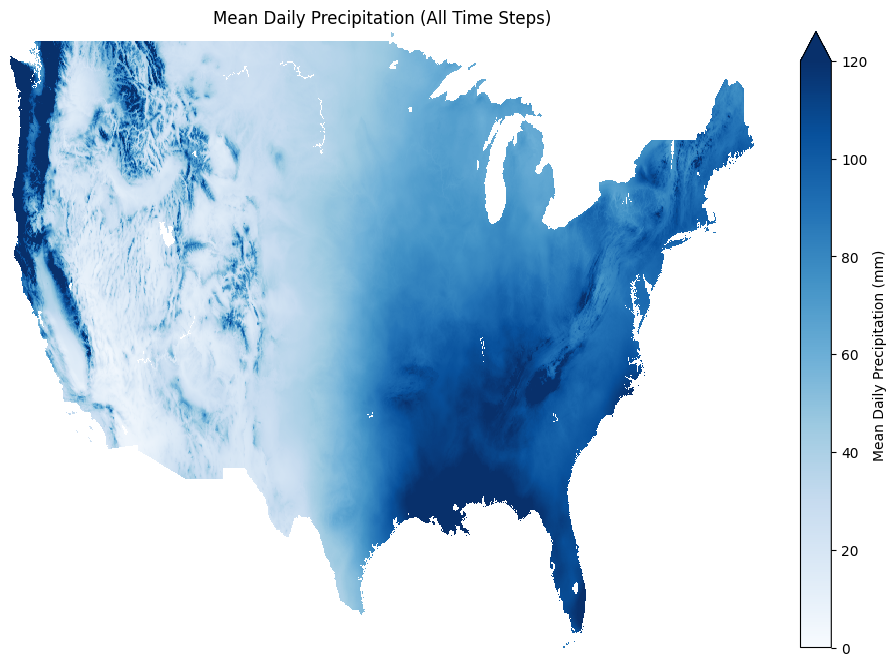

In [41]:
mean_precip_ds['prcp'].mean('time').plot(
    cmap='Blues',
    figsize=(12, 8),
    vmin=0, vmax=120,  # Adjust this range as needed
    cbar_kwargs={'label': 'Mean Daily Precipitation (mm)'}
)
plt.title("Mean Daily Precipitation (All Time Steps)")
plt.axis("off")
plt.show()

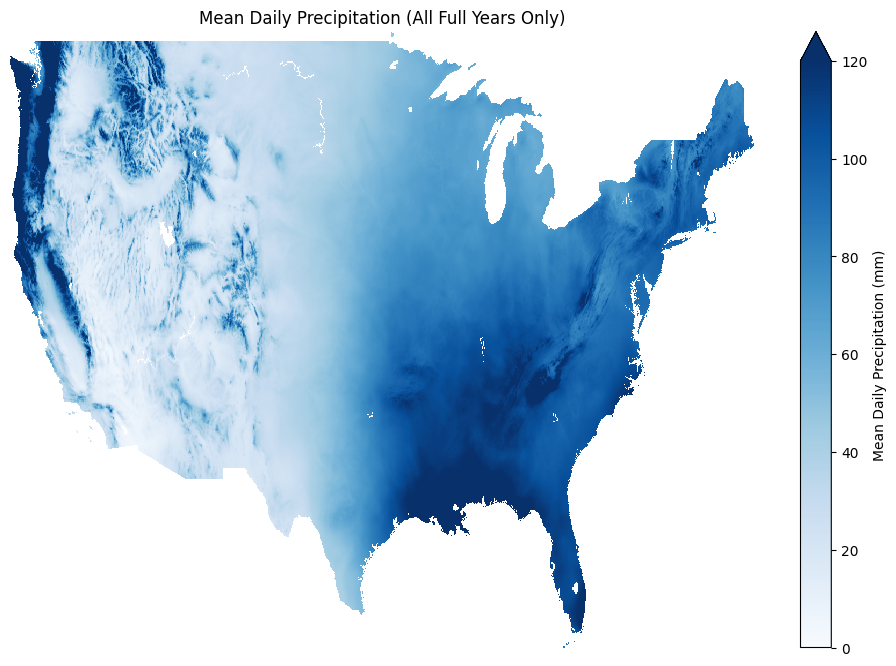

In [69]:
cleaned_precip_ds = drop_last_year(mean_precip_ds)
cleaned_precip_ds['prcp'].mean('time').plot(
    cmap='Blues',
    figsize=(12, 8),
    vmin=0,
    vmax=120,  # Optional: tweak based on distribution
    cbar_kwargs={'label': 'Mean Daily Precipitation (mm)'}
)
plt.title("Mean Daily Precipitation (All Full Years Only)")
plt.axis("off")
plt.show()


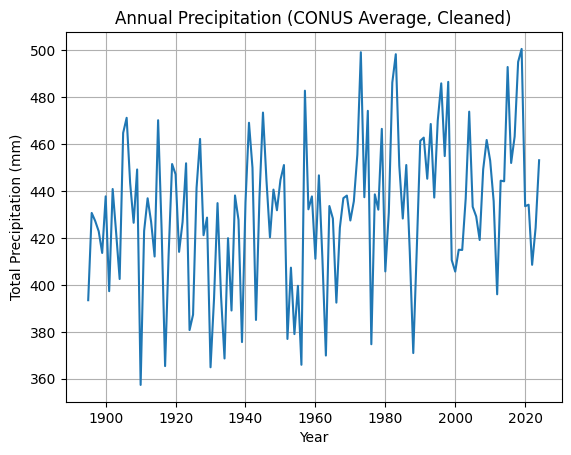

In [68]:
annual_precip = cleaned_precip_ds['prcp'].groupby('time.year').sum('time')
annual_precip_conus = annual_precip.mean(dim=['lat', 'lon'])

annual_precip_conus.plot()
plt.title("Annual Precipitation (CONUS Average, Cleaned)")
plt.ylabel("Total Precipitation (mm)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


c:\Users\AstroNoah\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


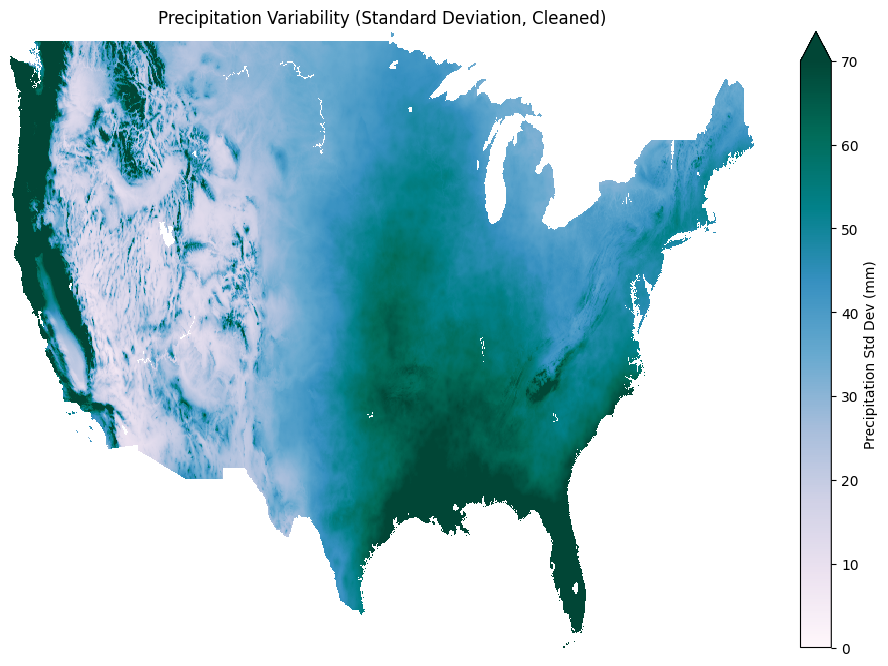

In [73]:
cleaned_precip_ds['prcp'].std('time').plot(
    cmap='PuBuGn',
    figsize=(12, 8),
    vmin=0,
    vmax=70,  # Optional: tweak based on scale
    cbar_kwargs={'label': 'Precipitation Std Dev (mm)'}
)
plt.title("Precipitation Variability (Standard Deviation, Cleaned)")
plt.axis("off")
plt.show()


### Max temps

In [ ]:
cleaned_max_temp_ds = drop_last_year(max_temp_ds)

Mean daily max temp

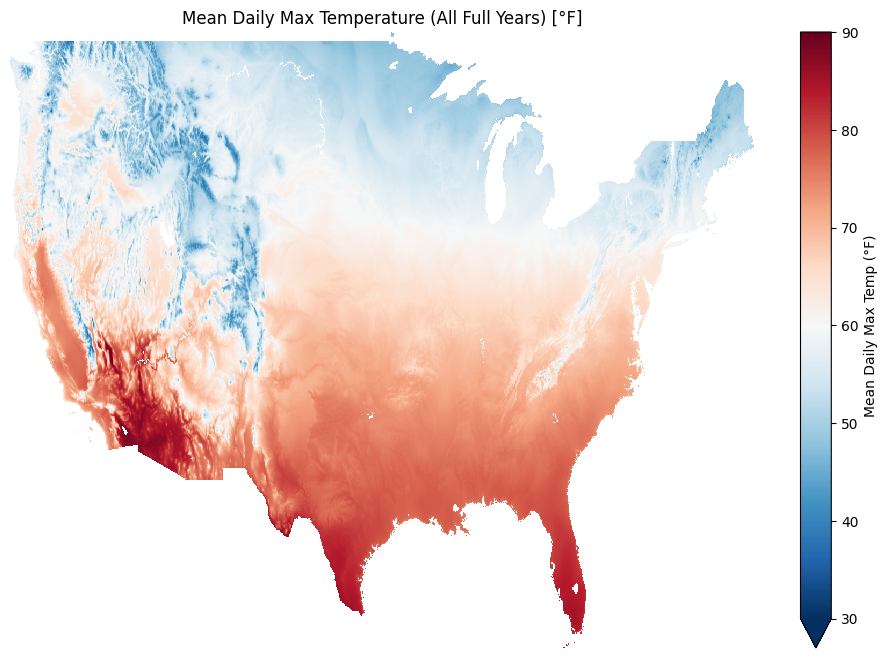

In [108]:
(cleaned_max_temp_ds['tmax'].mean('time') * 9/5 + 32).plot(
    cmap='RdBu_r',  # Red = hot, Blue = cold
    figsize=(12, 8),
    vmin=30, vmax=90,  # Set to good bounds for CONUS
    cbar_kwargs={'label': 'Mean Daily Max Temp (°F)'}
)

plt.title("Mean Daily Max Temperature (All Full Years) [°F]")
plt.axis("off")
plt.show()


c:\Users\AstroNoah\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


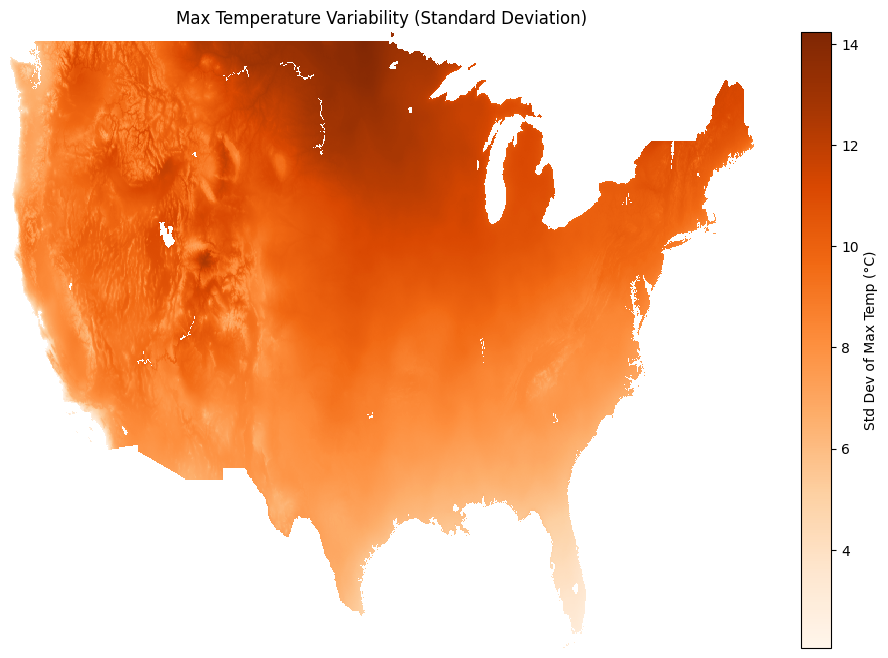

In [77]:
cleaned_max_temp_ds['tmax'].std('time').plot(
    cmap='Oranges',
    figsize=(12, 8),
    cbar_kwargs={'label': 'Std Dev of Max Temp (°C)'}
)
plt.title("Max Temperature Variability (Standard Deviation)")
plt.axis("off")
plt.show()


Annual max temps

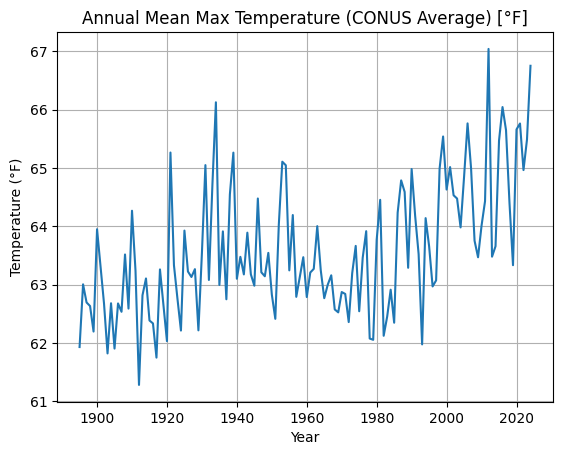

In [111]:
annual_tmax = cleaned_max_temp_ds['tmax'].groupby('time.year').mean('time')
annual_conus_tmax = annual_tmax.mean(dim=['lat', 'lon']) * 9/5 + 32

annual_conus_tmax.plot()
plt.title("Annual Mean Max Temperature (CONUS Average) [°F]")
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.grid(True)
plt.show()
